In [2]:
%load_ext autoreload
%autoreload 2

import pickle, gzip
import matplotlib.pyplot as plt
from src import ffnn
import random

In [3]:
def load_data():
    with gzip.open('data/mnist.pkl.gz', 'rb') as f:
        f.seek(0)
        training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
        return (training_data, validation_data, test_data)

training_data, validation_data, test_data = load_data()

In [4]:
print("Training has {} folders" .format(len(training_data)))
print("Training folder 1 has {a} images of digits and training folder 2 has {b} labels of those digit images" .format(a=len(training_data[0]), b=len(training_data[1])))
print("The images have shape {} each which is linear representation of 28*28" .format(training_data[0][0].shape))
print("The folder 2 has lables w.r.t the images in folder 1 which look like list of numbers : {c} and first label is {d}" .format(c=training_data[1], d=training_data[1][0]))

Training has 2 folders
Training folder 1 has 50000 images of digits and training folder 2 has 50000 labels of those digit images
The images have shape (784,) each which is linear representation of 28*28
The folder 2 has lables w.r.t the images in folder 1 which look like list of numbers : [5 0 4 ... 8 4 8] and first label is 5


[5 0 4 1 9 2]


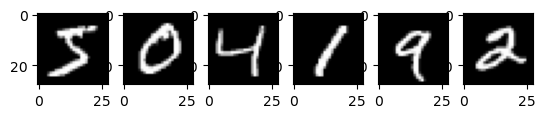

In [5]:
def view_image(images):
    
    '''
    This funtion takes input list of matrices of images reshapes them with 28*28 pixels and standard normalizes it and plots the images in the subplot respectively 
    @input : images [list(numpy.ndarray)]
    @output : None 
    '''
    
    n: int = len(images)
    f = plt.figure()
    
    for i in range(n):
        f.add_subplot(1, n, i + 1)
        reshape_img = images[i].reshape((28,28))
        normalize_img = reshape_img/255
        plt.imshow(normalize_img , cmap="gray")
#       plt.show(block=True)

# Viewing the first five images 
view_image(training_data[0][:6])

print(training_data[1][:6])

In [6]:
print(training_data[1].shape[0])

50000


In [7]:
import numpy as np

Y = np.zeros((training_data[1].shape[0], 10))
for i in range(training_data[1].shape[0]):
    Y[i, training_data[1][i]] = 1

print(Y[:6])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [22]:
v, w = ffnn.ffnn(training_data[0], 16, training_data[1], 10, 101, print_error=True)

KeyboardInterrupt: 

In [10]:
print(v)
print(w)

[[0.17768087 0.0151601  0.93159012 ... 0.69265899 0.42632257 0.07792331]
 [0.97006843 0.22021128 0.69709041 ... 0.20542557 0.64388056 0.17600339]
 [0.83087239 0.53886793 0.60145319 ... 0.33730403 0.22831621 0.82734028]
 ...
 [0.57384226 0.20586182 0.60729033 ... 0.40481641 0.48012095 0.18712389]
 [0.18603865 0.64402581 0.64437646 ... 0.77079835 0.38937239 0.89535508]
 [0.08914293 0.17471229 0.11999411 ... 0.0682969  0.74086835 0.9400585 ]]
[[-0.91238565 -1.8941807  -4.71836538 -0.50432467 -0.87672489 -0.68357173
  -2.11898948 -5.59972731 -3.82434444 -3.92209208]
 [-0.78124545 -1.4212451  -4.99066407 -1.09573251 -0.73490379 -0.2050717
  -1.99264839 -6.14410408 -3.71846547 -4.10775592]
 [-0.88868357 -1.82322368 -4.35874651 -0.63002265 -1.33395065 -0.2676703
  -2.33413857 -5.53838918 -3.42048833 -3.69607837]
 [-1.06402376 -1.58047172 -4.62543347 -0.5764998  -0.54442467 -0.67001187
  -2.38597441 -5.73988564 -3.10314823 -4.06230488]
 [-1.35679468 -1.46296013 -4.74576122 -0.66514063 -1.22941

35265


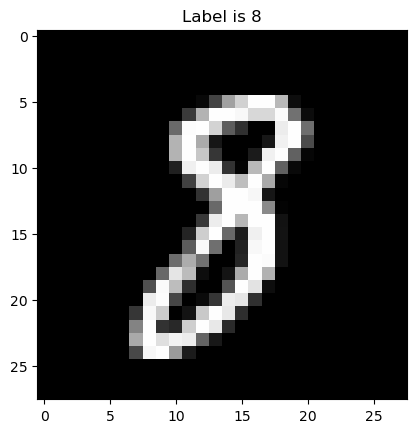

In [58]:
index  = random.randint(0, training_data[0].shape[0])
print(index)
#index = 15184

k = training_data[0][index,:]
k = k.reshape((28, 28))

plt.title('Label is {label}'.format(label= training_data[1][index]))
plt.imshow(k, cmap='gray')

In [59]:
array = training_data[0][index,]
array = array.reshape((1, 784))
#array.shape += (1,)
print(array.shape)

(1, 784)


In [60]:
G = ffnn.resolveForwardPropagation(array, v, w)

(1, 784)
(1, 785)
(1, 785)
(785, 16)


In [61]:
print(G.shape)
print(training_data[0][index].shape)

(1, 10)
(784,)


In [62]:
array = np.zeros(10)

for i in range(G.shape[0]):
    array[np.argmax(G[i])] += 1

print(array)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


(10, 784)


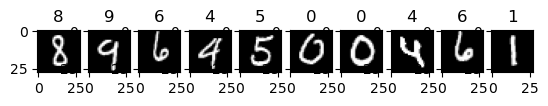

In [66]:
#index = 15184
index  = random.randint(0, training_data[0].shape[0])
number_of_images = 10
images = training_data[0][index:index+number_of_images]
imgs = np.zeros((number_of_images, 28, 28))
print(images.shape)
for i in range(number_of_images):
    imgs[i] = images[i].reshape((28,28))
    #images[i] = images[i]/255
#image1 = images[0].reshape((28,28))
#image2 = images[1].reshape((28,28))
fig, ax = plt.subplots(1, number_of_images)
for i in range(number_of_images):
    ax[i].title.set_text('{label}'.format(label= training_data[1][index+i]))
    ax[i].imshow(imgs[i], cmap='gray')
#ax[0].title.set_text('Label is {label}'.format(label= training_data[1][index]))
#ax[0].imshow(image1, cmap='gray')
#ax[1].title.set_text('Label is {label}'.format(label= training_data[1][index+1]))
#ax[1].imshow(image2, cmap='gray')

In [72]:
#np.set_printoptions(threshold=np.inf)
G = ffnn.resolveForwardPropagation(training_data[0][index:index+number_of_images], v, w)

(10, 784)
(10, 785)
(10, 785)
(785, 16)


In [73]:
print(G.shape)
print(training_data[0][index:index+2].shape)

array = np.zeros(10)

for i in range(G.shape[0]):
    array[np.argmax(G[i])] += 1

print(array)

(10, 10)
(2, 784)
[ 0.  0.  0.  0.  0. 10.  0.  0.  0.  0.]


In [23]:
print(G.shape)
print(G)

(2, 10)
[[3.48092147e-08 1.20005713e-13 2.59427583e-36 7.85256169e-07
  7.56134146e-07 8.78602724e-06 8.52508730e-17 7.99422793e-44
  1.15063682e-27 6.87511857e-30]
 [3.48092147e-08 1.20005713e-13 2.59427583e-36 7.85256169e-07
  7.56134146e-07 8.78602724e-06 8.52508730e-17 7.99422793e-44
  1.15063682e-27 6.87511857e-30]]


In [74]:
new_v = np.loadtxt('v.csv', delimiter=',')
new_w = np.loadtxt('w.csv', delimiter=',')

In [75]:
print(new_v.shape)
print(new_w.shape)

(115, 784)
(128,)


In [76]:
G = ffnn.resolveForwardPropagation(training_data[0][index:index+number_of_images], v, w)

(10, 784)
(10, 785)
(10, 785)
(785, 16)


In [78]:
print(G.shape)
print(training_data[0][index:index+2].shape)

array = np.zeros(10)

for i in range(G.shape[0]):
    array[np.argmax(G[i])] += 1

print(array)
print(G)

(10, 10)
(2, 784)
[ 0.  0.  0.  0.  0. 10.  0.  0.  0.  0.]
[[3.48092147e-08 1.20005713e-13 2.59427583e-36 7.85256169e-07
  7.56134146e-07 8.78602724e-06 8.52508730e-17 7.99422793e-44
  1.15063682e-27 6.87511857e-30]
 [3.48092147e-08 1.20005713e-13 2.59427583e-36 7.85256169e-07
  7.56134146e-07 8.78602724e-06 8.52508730e-17 7.99422793e-44
  1.15063682e-27 6.87511857e-30]
 [3.48092147e-08 1.20005713e-13 2.59427583e-36 7.85256169e-07
  7.56134146e-07 8.78602724e-06 8.52508730e-17 7.99422793e-44
  1.15063682e-27 6.87511857e-30]
 [3.48092147e-08 1.20005713e-13 2.59427583e-36 7.85256169e-07
  7.56134146e-07 8.78602724e-06 8.52508730e-17 7.99422793e-44
  1.15063682e-27 6.87511857e-30]
 [3.48092147e-08 1.20005713e-13 2.59427583e-36 7.85256169e-07
  7.56134146e-07 8.78602724e-06 8.52508730e-17 7.99422793e-44
  1.15063682e-27 6.87511857e-30]
 [3.48092147e-08 1.20005713e-13 2.59427583e-36 7.85256169e-07
  7.56134146e-07 8.78602724e-06 8.52508730e-17 7.99422793e-44
  1.15063682e-27 6.87511857e-30

In [ ]:
def data_wrapper():
    
    '''
    @purpose : This funtion is used to extract the training validation and test data 
    @input : None 
    @output : truple (training features, training labels, validation features, validation labels)
    @return : Truple(matrices)
    '''
    
    # Upacking 
    tr_d, va_d, te_d = load_data()
    
    # Training
    training_inputs = np.array(tr_d[0][:]).T    # [50000, 784] -> [784, 50000]
    
    training_results = np.array(tr_d[1][:])     # [50000,]
    train_set_y_ohe = one_hot(training_results)     # [10 ,50000]
    
    # Keras model input requirement 
    #For implementing in Keras, the input training and input target dataset are supposed to have shape (m, n) where m is the number of training samples and n is the number of parts in a single input.
    #Hence, let create the desired dataset shapes by taking transpose.
    
    training_inputs = training_inputs.T # [784, 50000] -> [50000, 784]
    train_set_y = train_set_y_ohe.T    # [10 ,50000] -> [50000, 10]
    
    
    # Validation
    validation_inputs = np.array(va_d[0][:]).T
    
    validation_results = np.array(va_d[1][:])
    validation_set_y_ohe = one_hot(validation_results)
    
    # Keras model input requirement 
    #For implementing in Keras, the input training and input target dataset are supposed to have shape (m, n) where m is the number of training samples and n is the number of parts in a single input.
    #Hence, let create the desired dataset shapes by taking transpose.
    validation_inputs = validation_inputs.T
    validation_set_y = validation_set_y_ohe.T
    
    # Testing
    test_inputs = np.array(te_d[0][:]).T
    
    test_results = np.array(te_d[1][:])
    test_set_y_ohe = one_hot(test_results)
    
    # Keras model input requirement 
    #For implementing in Keras, the input training and input target dataset are supposed to have shape (m, n) where m is the number of training samples and n is the number of parts in a single input.
    #Hence, let create the desired dataset shapes by taking transpose.
    test_inputs = test_inputs.T
    test_set_y = test_set_y_ohe.T
    
    return (training_inputs, train_set_y, validation_inputs, validation_set_y)

In [10]:
print(ffnn.resolveForwardPropagation(training_data[0][index], v, w))

NameError: name 'index' is not defined